In [22]:
# For Data pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir

#Feature Engineering
from sklearn.preprocessing import  LabelBinarizer
from tensorflow.keras.utils import img_to_array, array_to_img

# For Model Development
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from sklearn.model_selection import train_test_split

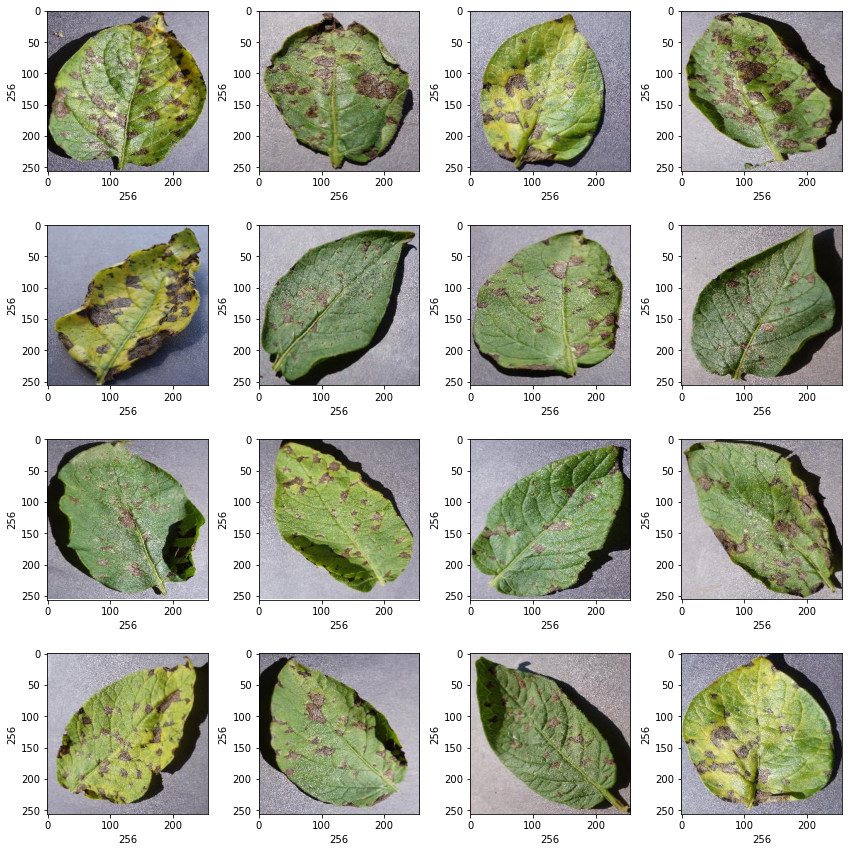

In [23]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "A:\Additional\Data\Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [24]:
dir = "A:\Additional\Data"
categories = listdir(dir)
images,labels = [],[]
print(categories)

['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']


#### Seprating Images and their Labels

In [25]:
for disease in categories:
    for files in listdir(f"{dir}/{disease}"):
        image_path = f"{dir}/{disease}/{files}"
        img = cv2.imread(image_path)
        img = img_to_array(img)
        images.append(img)
        labels.append(disease)

In [26]:
label_counts = pd.DataFrame(labels).value_counts()
label_counts

Corn_(maize)___Common_rust_    300
Potato___Early_blight          300
Tomato___Bacterial_spot        300
dtype: int64

In [27]:
num_classes = len(label_counts)
num_classes

3

In [28]:
images[7].shape

(256, 256, 3)

### Feature Engineering

In [29]:
trans_img=np.array(images,dtype=np.float16)/255.0
img2=trans_img.reshape(-1,256,256,3)

In [30]:
labels = np.array(labels)
labels.shape
encoded_ = [i for i in range(len(categories))]
#print(encoded_,categories)
label_dict = dict(zip(encoded_,categories))
print(label_dict)

{0: 'Corn_(maize)___Common_rust_', 1: 'Potato___Early_blight', 2: 'Tomato___Bacterial_spot'}


In [31]:
lb = LabelBinarizer()
encoded = lb.fit_transform(labels)
print(lb)
print(lb.classes_)
print(encoded)

LabelBinarizer()
['Corn_(maize)___Common_rust_' 'Potato___Early_blight'
 'Tomato___Bacterial_spot']
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [32]:
x_train, x_test, y_train, y_test = train_test_split(img2, encoded, test_size=0.3, random_state = 42) 

In [33]:
print("Train_labesl:",y_train,"\n")
print("Test_labels:",y_test)

Train_labesl: [[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 0 1]
 [0 1 0]
 [1 0 0]] 

Test_labels: [[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [

In [37]:
model = Sequential()

model.add(Conv2D(8, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))


model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 85, 85, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 21, 21, 32)      

In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(),metrics=['accuracy'])

In [39]:
h1 = model.fit(x_train,y_train,epochs=15,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/15
5/5 [==============================] - 31s 5s/step - loss: 1.0634 - accuracy: 0.3651 - val_loss: 0.9584 - val_accuracy: 0.7148
Epoch 2/15
5/5 [==============================] - 18s 4s/step - loss: 0.8821 - accuracy: 0.6365 - val_loss: 0.7088 - val_accuracy: 0.7481
Epoch 3/15
5/5 [==============================] - 19s 4s/step - loss: 0.6134 - accuracy: 0.7825 - val_loss: 0.3944 - val_accuracy: 0.8963
Epoch 4/15
5/5 [==============================] - 19s 4s/step - loss: 0.3134 - accuracy: 0.9635 - val_loss: 0.1494 - val_accuracy: 0.9704
Epoch 5/15
5/5 [==============================] - 19s 4s/step - loss: 0.1477 - accuracy: 0.9698 - val_loss: 0.1301 - val_accuracy: 0.9630
Epoch 6/15
5/5 [==============================] - 19s 4s/step - loss: 0.0718 - accuracy: 0.9825 - val_loss: 0.0460 - val_accuracy: 0.9815
Epoch 7/15
5/5 [==============================] - 20s 4s/step - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.0226 - val_accuracy: 0.9963
Epoch 8/15
5/5 [==================

#### Ploting Performance

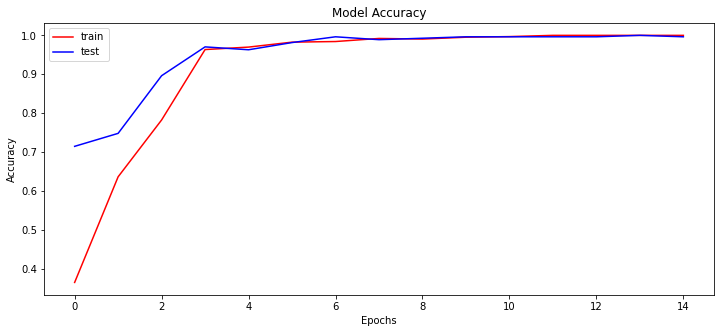

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(h1.history['accuracy'], color='r')
plt.plot(h1.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

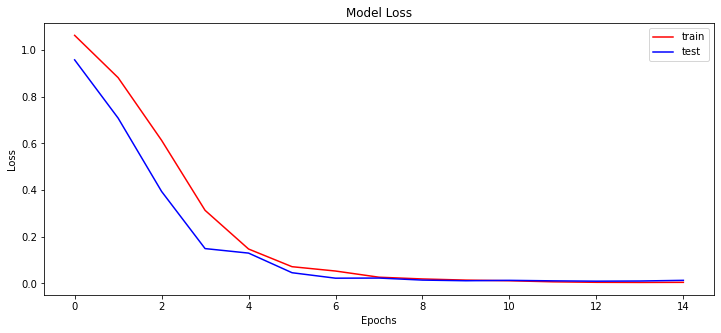

In [41]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(h1.history['loss'], color='r')
plt.plot(h1.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [42]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

9/9 [==============================] - 3s 335ms/step - loss: 0.0134 - accuracy: 0.9963
Test Accuracy: 99.62962865829468


In [43]:
# Storing predictions
y_pred = model.predict(x_test)

9/9 [==============================] - 4s 312ms/step


### Predictions

In [44]:
def Disease():
    labels = lb.classes_
    val = int(input("Fill the index value of Image:"))
    img = array_to_img(x_test[val])
    plt.imshow(img)
    print("Originally : ",labels[np.argmax(y_test[val])])
    print("Predicted : ",labels[np.argmax(y_pred[val])])

Fill the index value of Image:12
Originally :  Tomato___Bacterial_spot
Predicted :  Tomato___Bacterial_spot


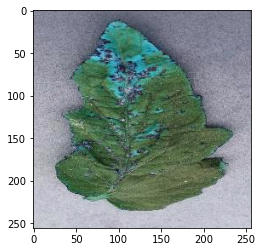

In [45]:
Disease()